In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
columnas = ["date", "device_id", "platform", "ref_type_id", "source_id"]
# Definicion de tipos
tipos = {"device_id" : np.int64,
         "platform" : np.int8,
         "ref_type_id" : np.int8,
         "source_id" : np.int8}
# Carga de datos
auctions = pd.read_csv("auctions.csv.gzip",compression = 'gzip', usecols=columnas, dtype=tipos, parse_dates=["date"])


In [3]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           datetime64[ns]
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
dtypes: datetime64[ns](1), int64(1), int8(3)
memory usage: 354.6 MB


In [4]:
auctions.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


## Revisaremos los datos referidos a la fecha

In [3]:
#auctions["day_of_week"] = auctions["date"].dt.day_name()

In [6]:
#auctions["day_of_week"].head()

0    Monday
1    Monday
2    Monday
3    Monday
4    Monday
Name: day_of_week, dtype: object

In [5]:
auctions["date"].min()

Timestamp('2019-03-05 00:52:33.352526')

In [6]:
auctions["date"].min().day_name()

'Tuesday'

In [7]:
auctions["date"].max()

Timestamp('2019-03-13 23:59:59.997032')

In [8]:
auctions["date"].max().day_name()

'Wednesday'

#### Se puede observar que el primer dia de datos es el Martes 05/03 y el último es el Miércoles 13/03

## ¿Cómo es la tendencia en cuanto a cantidad de subastas con el correr de los días?

In [113]:
auctions_count = auctions.groupby(pd.Grouper(key="date",freq="D"))["device_id"]\
                       .agg("count").reset_index()\
                       .rename(columns ={"device_id":"Cantidad de Subastas"})
    
auctions_count["date"] = auctions_count["date"].dt.strftime('%m/%d')                       


Text(0, 0.5, 'Cantidad de subastas')

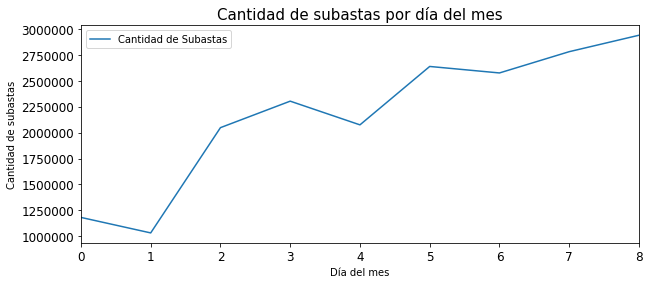

In [115]:
grafico = auctions_count.plot(kind="line",figsize=(10,4),fontsize=12)
grafico.set_title("Cantidad de subastas por día del mes",fontsize=15)
grafico.set_xlabel("Día del mes")
grafico.set_ylabel("Cantidad de subastas")


Text(0, 0.5, 'Cantidad de subastas')

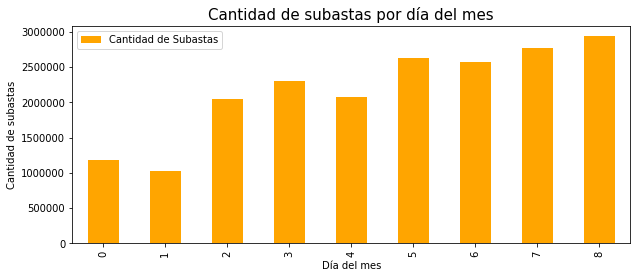

In [127]:
grafico = auctions_count.plot(kind="bar",color="Orange",figsize = (10,4))
grafico.set_title("Cantidad de subastas por día del mes",fontsize=15)
grafico.set_xlabel("Día del mes")
grafico.set_ylabel("Cantidad de subastas")

In [125]:
auctions_count.head()

,date,Cantidad de Subastas
0,03/05,1182401
1,03/06,1032970
2,03/07,2047661
3,03/08,2303002
4,03/09,2074552


#### Se puede observar que a partir del dia 06/3 la cantidad de subastas toma una tendencia predominantemente ascendente, también se puede apreciar una caida en la cantidad de subastas los dias 09/03 y 11/03.

## Vamos a ver como fue la evolucion de la cantidad de subastas a traves de los dias para el sistema operativo Android vs iOS

In [128]:
auctions_count = auctions.groupby([pd.Grouper(key="date",freq="d"),"platform"])["device_id"]\
                          .count().reset_index()
                        
#Formato para las fechas en el grafico
auctions_count["date"] = auctions_count["date"].dt.strftime('%m/%d')                       


In [129]:
auctions_count = auctions_count.pivot("date","platform","device_id")
auctions_count

platform,1,2
date,,
03/05,719286,463115
03/06,579624,453346
03/07,1617609,430052
03/08,1898054,404948
03/09,1618742,455810
03/10,2149876,487658
03/11,2165005,409911
03/12,2337162,442748
03/13,2456467,481906


Text(0, 0.5, 'Cantidad de subastas')

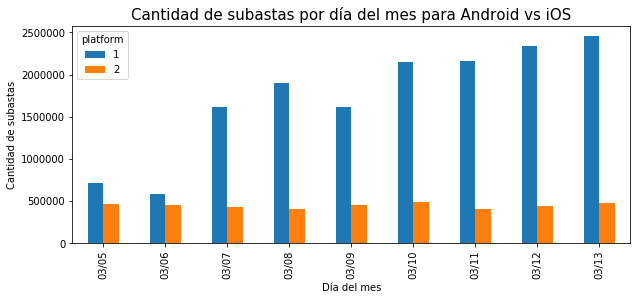

In [134]:
grafico = auctions_count.plot(kind="bar",figsize = (10,4))
grafico.set_title("Cantidad de subastas por día del mes para Android vs iOS",fontsize=15)
grafico.set_xlabel("Día del mes")
grafico.set_ylabel("Cantidad de subastas")

Text(0, 0.5, 'Cantidad de subastas')

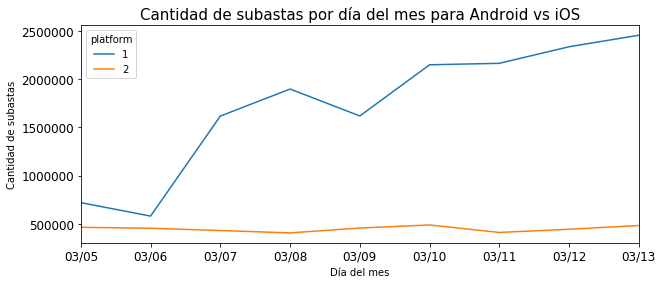

In [133]:
grafico = auctions_count.plot(kind="line",figsize=(10,4),fontsize=12)
grafico.set_title("Cantidad de subastas por día del mes para Android vs iOS",fontsize=15)
grafico.set_xlabel("Día del mes")
grafico.set_ylabel("Cantidad de subastas")

###### Comentario sobre el grafico: Aparece en el cuadro de platform el valor 0, no se de donde lo saca ni como eliminarlo.

#### Se puede observar que para Android(asumido por su gran cantidad de valores) se mantiene la misma tendencia que la vista para el total de dispositivos. Esto se debe a que la evolución de subastas en el tiempo para iOS se mantiene casi constante, este es un dato interesante. La variabilidad del total de dispositivos vista anteriormente esta dada solamente por Android, cuyos dispositivos van aumentando al pasar de los dias.

#### Vamos a ver cuales son los valores al pasar de los dias para iOS

In [30]:
auctions_count[auctions_count["platform"] == 2]

,date,platform,device_id
1,03/05,2,463115
3,03/06,2,453346
5,03/07,2,430052
7,03/08,2,404948
9,03/09,2,455810
11,03/10,2,487658
13,03/11,2,409911
15,03/12,2,442748
17,03/13,2,481906


In [34]:
auctions_count[auctions_count["platform"]==2]\
              .agg({"device_id":"mean"}).round()

device_id    447722.0
dtype: float64

#### Se puede ver que la cantidad de dispositivos con sistema operativo iOS se mantiene con un valor promedio a 447 mil

## ¿ Cómo es la cantidad de subastas según el día y hora de la semana?

In [3]:
auctions["day_of_week"] = auctions["date"].dt.day_name()

#### Voy hacer el analisis descartando los dos primeros días que son los valores con menos cantidad de subastas, el analisis va desde 07/03 - 13/03

In [44]:
auctions_count = auctions[(auctions["date"] >= "03-07-2019")]\
                .groupby( [pd.Grouper(key="date",freq="h"),"day_of_week" ])["platform"]\
                .count().reset_index()

                       

In [45]:
### No sé si hay otra manera de hacer el pivot de forma que no tenga que hacer el reset_index luego
heat = auctions_count.pivot("date","day_of_week","platform").reset_index()
heat["date"] = heat["date"].dt.hour  
heat = heat.groupby("date").agg("sum")

Text(114.0, 0.5, 'Cantidad de subastas')

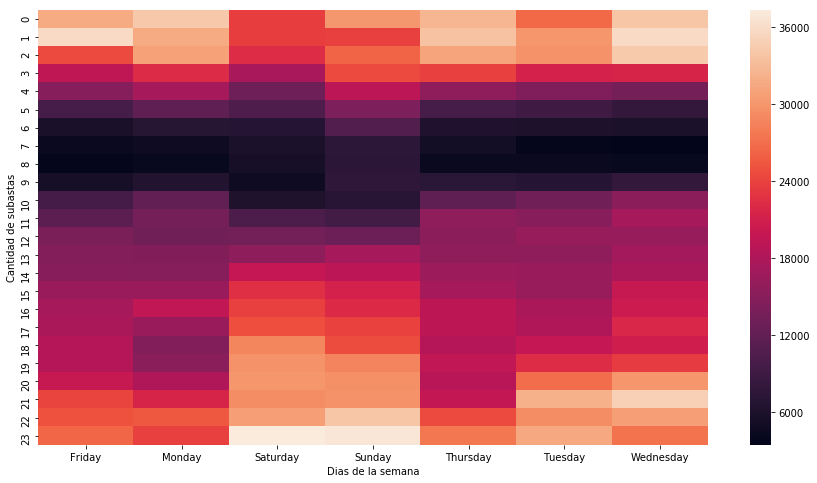

In [59]:
fig,ax = plt.subplots(figsize = (15,8))
sns.heatmap(heat)
ax.set_xlabel("Dias de la semana")
ax.set_ylabel("Cantidad de subastas")


### Vamos a ver la misma distribución para Android y iOS

#### Android:

In [70]:
auctions_count = auctions[(auctions["date"] >= "03-07-2019") & (auctions["platform"] == 1 )]\
                .groupby( [pd.Grouper(key="date",freq="h"),"day_of_week" ])["platform"]\
                .count().reset_index()

In [72]:
### No sé si hay otra manera de hacer el pivot de forma que no tenga que hacer el reset_index luego
heat_android = auctions_count.pivot("date","day_of_week","platform").reset_index()
heat_android["date"] = heat_android["date"].dt.hour  
heat_android = heat_android.groupby("date").agg("sum")

### iOS:

In [73]:

auctions_count = auctions[(auctions["date"] >= "03-07-2019") & (auctions["platform"] == 2 )]\
                .groupby( [pd.Grouper(key="date",freq="h"),"day_of_week" ])["platform"]\
                .count().reset_index()

In [74]:
### No sé si hay otra manera de hacer el pivot de forma que no tenga que hacer el reset_index luego
heat_ios = auctions_count.pivot("date","day_of_week","platform").reset_index()
heat_ios["date"] = heat_ios["date"].dt.hour  
heat_ios = heat_ios.groupby("date").agg("sum")

#### Comparacion:    

Text(0.5, 0.98, 'Distribución de cantidad de subastas por hora y dia. Android vs iOS')

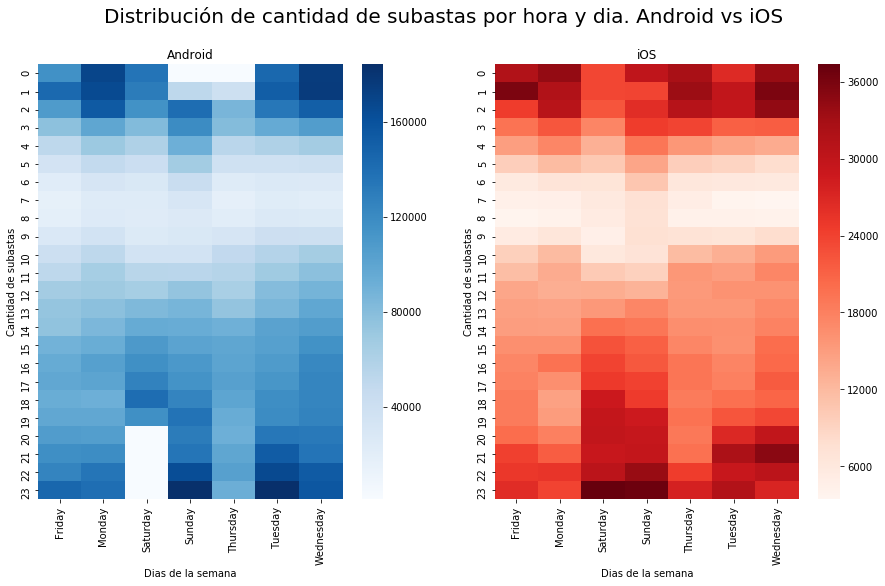

In [81]:
fig,ejes = plt.subplots(1,2,figsize = (15,8))
ax1 = ejes[0]
ax2 = ejes[1]
sns.heatmap(heat_android, cmap = "Blues",ax = ax1)
sns.heatmap(heat_ios,cmap = "Reds",ax = ax2)
ax2.set_title("iOS")
ax2.set_xlabel("Dias de la semana")
ax2.set_ylabel("Cantidad de subastas")
ax1.set_title("Android")
ax1.set_xlabel("Dias de la semana")
ax1.set_ylabel("Cantidad de subastas")
fig.suptitle("Distribución de cantidad de subastas por hora y dia. Android vs iOS",fontsize =20)


##### Comentario:  Hay que reordenar los dias

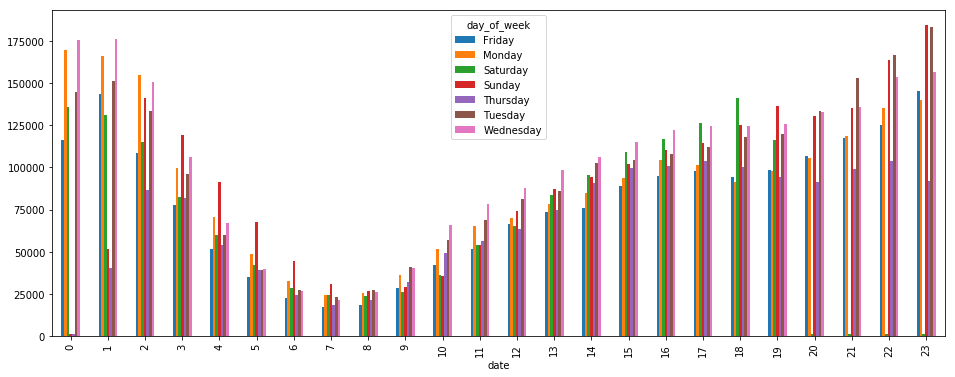

In [120]:
heat_android.plot(kind="bar",figsize=(16,6))